In [1]:
import warnings
warnings.filterwarnings('ignore')

import urllib, json
from urllib.request import urlopen
import numpy as np
from io import open
import ast
import time
import requests
import pandas as pd

from IPython.core.display import HTML,display
display(HTML("<style>.container { width:85% !important; }</style>"))

%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'


from collections import Counter

In [4]:
resvec = np.load('resvec.npy',allow_pickle=True)
faculties = np.load('fname.npy',allow_pickle=True)

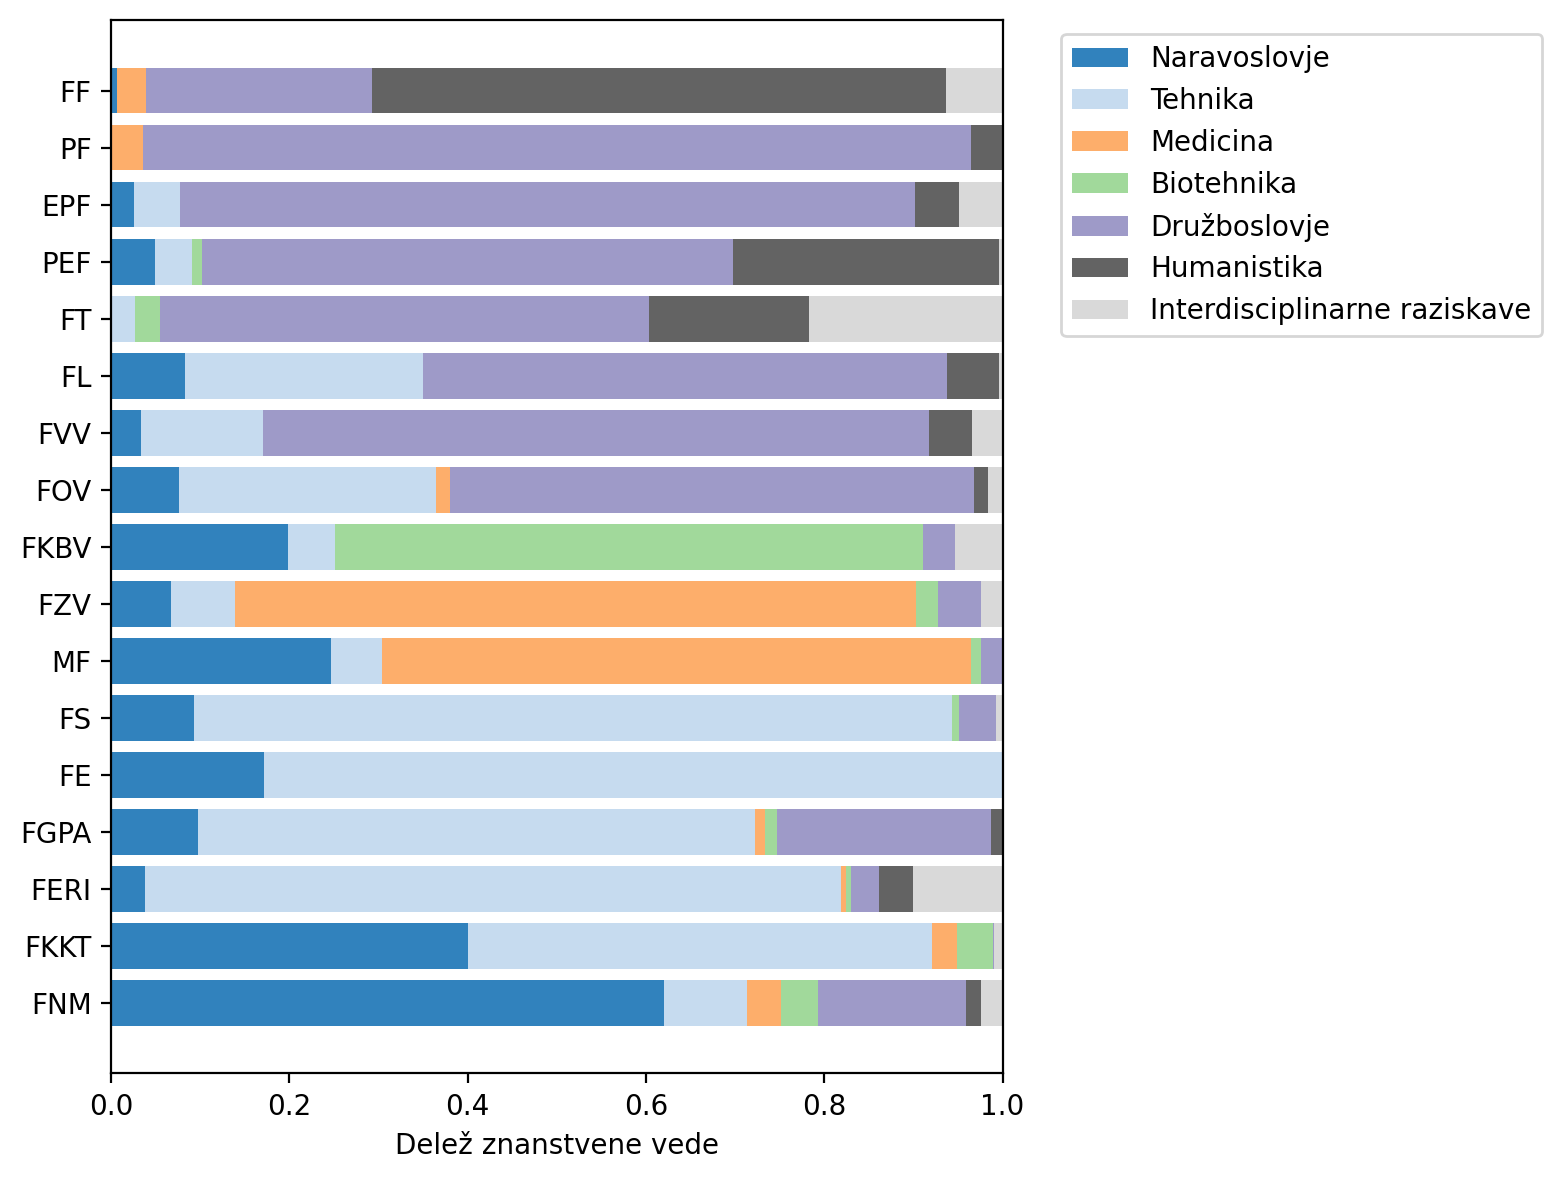

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (randomly generated for example purposes)
#faculties = [f'Faculty {i+1}' for i in range(17)]
fields = ['Naravoslovje', 'Tehnika', 'Medicina', 'Biotehnika', 'Družboslovje', 'Humanistika', 'Interdisciplinarne raziskave']

# Example vectors (replace with your actual data)
#data = np.random.dirichlet(np.ones(7), size=17)
data = np.array(resvec)

# Sorting faculties by their dominant research field for better visualization
dominant_field = np.argmax(data, axis=1)
sort_order = np.argsort(dominant_field)
sorted_data = data[sort_order]
sorted_faculties = [faculties[i] for i in sort_order]

# Plot stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
left = np.zeros(len(sorted_faculties))

colors = plt.cm.tab20c(np.linspace(0, 1, len(fields)))

for idx, (field, color) in enumerate(zip(fields, colors)):
    ax.barh(sorted_faculties, sorted_data[:, idx], left=left, color=color, label=field)
    left += sorted_data[:, idx]

ax.set_xlabel('Delež znanstvene vede')
#ax.set_title('Distribution of Research Activity Across Faculties')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
